In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('spam.csv',encoding='latin1')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 3)

## DATA CLEANING


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   spamORham   5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [9]:
df.sample(5)

,Unnamed: 0,spamORham,Message
319,319,ham,"Coffee cake, i guess..."
5428,5428,ham,You didnt complete your gist oh.
1878,1878,ham,I AM AT A PARTY WITH ALEX NICHOLS
636,636,ham,"Sweetheart, hope you are not having that kind ..."
2483,2483,ham,Mm have some kanji dont eat anything heavy ok


In [11]:
df=df.drop(["Unnamed: 0"],axis=1)
df=df.rename(columns={'spamORham':'target','Message':'text'})
df.sample(5)

,target,text
4603,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!
3127,ham,would u fuckin believe it they didnt know i ha...
5093,ham,Gokila is talking with you aha:)
960,ham,U sure u can't take any sick time?
4852,ham,I'm fine. Hope you are also


In [13]:
df=df.rename(columns={'v1':'target','v2':'text'})
df.sample(5)

,target,text
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...
4743,ham,"\Thinking of u ;) x\"""""
3013,ham,I might go 2 sch. Yar at e salon now v boring.
652,ham,"Wait, do you know if wesleys in town? I bet sh..."
2167,ham,Yes.he have good crickiting mind


In [15]:
df.target.value_counts()


target
ham     4825
spam     747
Name: count, dtype: int64

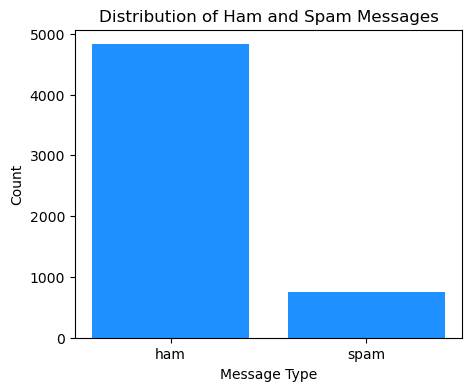

In [17]:
import matplotlib.pyplot as plt
ham_count = df[df['target'] == 'ham'].shape[0]
spam_count = df[df['target'] == 'spam'].shape[0]
labels = ['ham', 'spam']
counts = [ham_count, spam_count]
fig, ax = plt.subplots(figsize=(5,4))
bar_width = 0.4
plt.bar(labels, counts, color=['#1E90FF'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')

plt.show()

In [19]:
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [25]:
df.shape


(5169, 2)

In [27]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

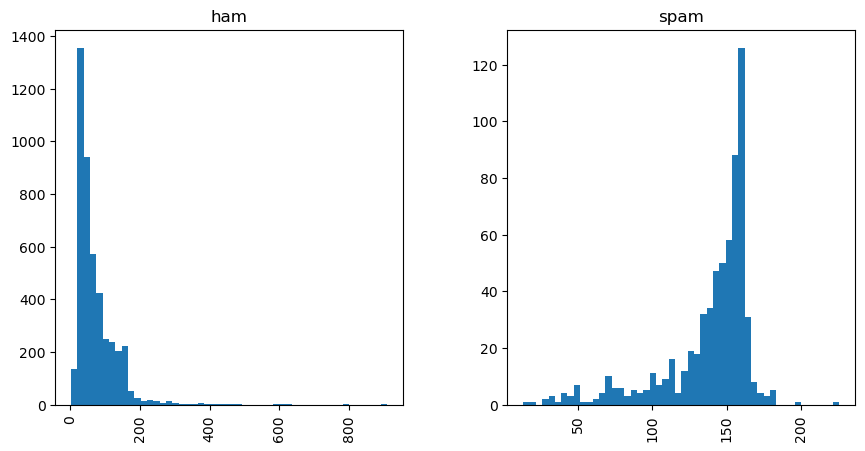

In [29]:

import matplotlib.pyplot as plt
df.hist(column='num_characters',by='target',bins=50,figsize=(10,5))

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [33]:
df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
!pip install nltk

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.186883,18.456761,1.966531
std,58.380576,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.575952,17.123782,1.820195
std,56.396321,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.738132,27.675345,2.978560
std,30.418104,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

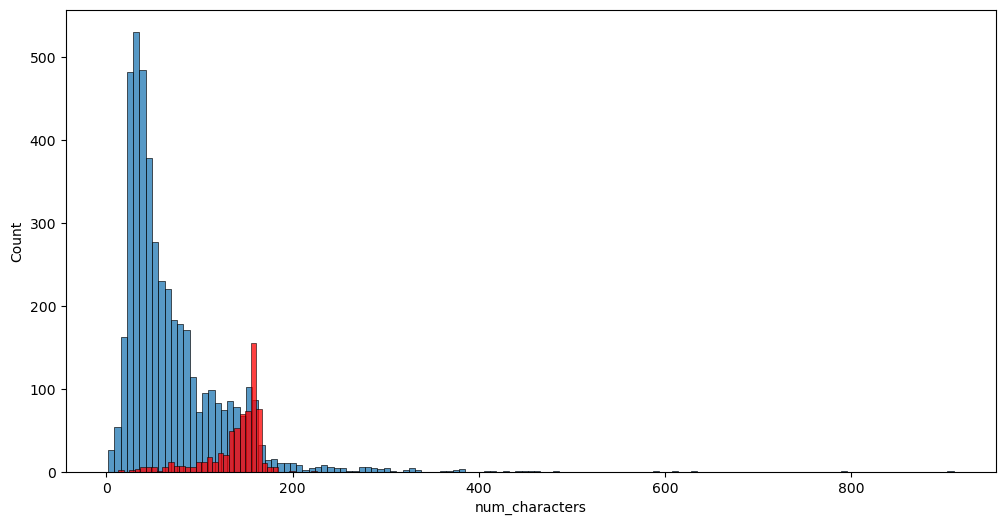

In [53]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


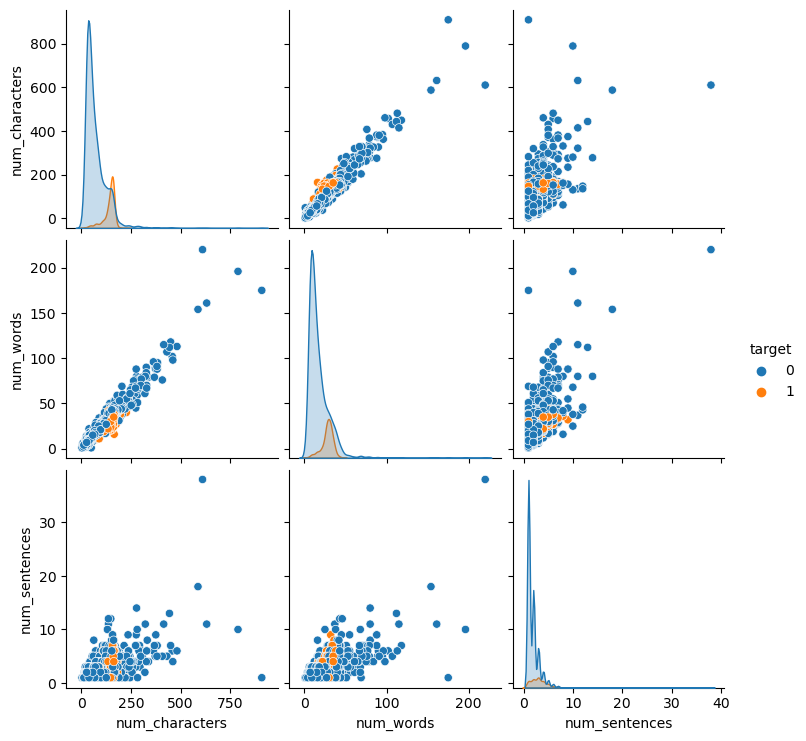

In [55]:
sns.pairplot(df,hue='target')

## data preprocessing

In [58]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [64]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [66]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [68]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

In [72]:
df.head()
df.to_csv('output.csv', index=False)

In [74]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [80]:
X.shape

(5169, 3000)

In [82]:
y = df['target'].values

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score for GausssianNb:",accuracy_score(y_test,y_pred1))
print("Precision Score for GausssianNb:",precision_score(y_test,y_pred1))
print(recall_score)

print(confusion_matrix(y_test,y_pred1))
f1 = f1_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)

print("F1 Score for GausssianNb:", f1)
print("Recall for GausssianNb:", recall)

Accuracy Score for GausssianNb: 0.8733075435203095
Precision Score for GausssianNb: 0.5161290322580645
<function recall_score at 0x0000023812CE8040>
[[791 105]
 [ 26 112]]
F1 Score for GausssianNb: 0.6309859154929578
Recall for GausssianNb: 0.8115942028985508


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score for Spam SMS classification:",accuracy_score(y_test,y_pred2))
print("Precision Score for Spam SMS classification:",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
f1 = f1_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

print("F1 Score for Spam SMS classification:", f1)
print("Recall for Spam SMS classification:", recall)

Accuracy Score for Spam SMS classification: 0.971953578336557
Precision Score for Spam SMS classification: 1.0
[[896   0]
 [ 29 109]]
F1 Score for Spam SMS classification: 0.8825910931174089
Recall for Spam SMS classification: 0.7898550724637681


In [100]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score for Spam SMS classification:",accuracy_score(y_test,y_pred3))
print("Precision Score for Spam SMS classification:",precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))


f1 = f1_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)

print("F1 Score for Spam SMS classification:", f1)
print("Recall for Spam SMS classification:", recall)

Accuracy Score for Spam SMS classification: 0.9835589941972921
Precision Score for Spam SMS classification: 0.991869918699187
[[895   1]
 [ 16 122]]
F1 Score for Spam SMS classification: 0.9348659003831418
Recall for Spam SMS classification: 0.8840579710144928


In [104]:
from sklearn.metrics import f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print("Accuracy Score for Spam SMS classification:",accuracy_score(y_test,y_pred))
print("Precision Score for Spam SMS classification:",precision_score(y_test,y_pred))

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))

print("F1 Score for Spam SMS classification:", f1)
print("Recall for Spam SMS classification:", recall)


Accuracy Score for Spam SMS classification: 0.9042553191489362
Precision Score for Spam SMS classification: 1.0
[[889   0]
 [ 99  46]]
F1 Score for Spam SMS classification: 0.48167539267015713
Recall for Spam SMS classification: 0.31724137931034485


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


y_pred = dtree.predict(X_test)

print("Accuracy Score for Spam SMS classification:",accuracy_score(y_test,y_pred))
print("Precision Score for Spam SMS classification:",precision_score(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))


print("F1 Score for Spam SMS classification:", f1)
print("Recall for Spam SMS classification:", recall)

Accuracy Score for Spam SMS classification: 0.9458413926499033
Precision Score for Spam SMS classification: 0.7986577181208053
[[859  30]
 [ 26 119]]
F1 Score for Spam SMS classification: 0.8095238095238095
Recall for Spam SMS classification: 0.8206896551724138


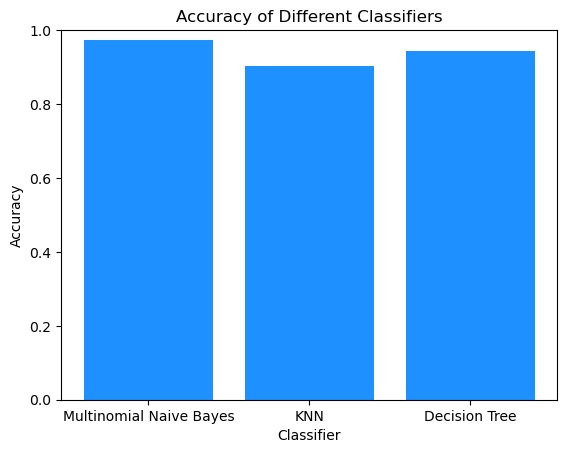

In [110]:
classifiers = {
    'Multinomial Naive Bayes':MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store accuracies
accuracies = {}

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot histogram
plt.bar(accuracies.keys(), accuracies.values(), color=[ '#1E90FF'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)  
plt.show()

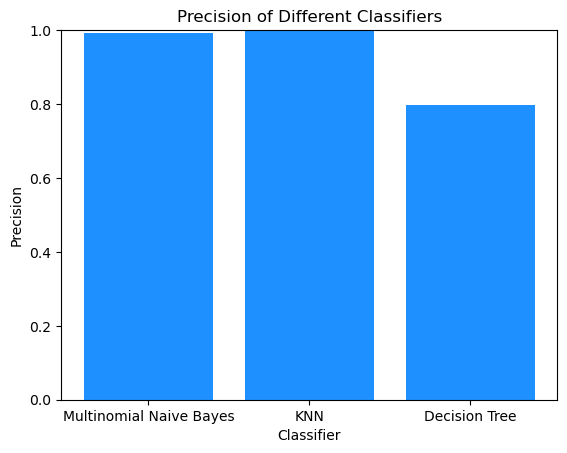

In [112]:
classifiers = {
    'Multinomial Naive Bayes':MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store accuracies
precisions = {}

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precisions[name] = precision_score(y_test, y_pred)

# Plot histogram
plt.bar(precisions.keys(), precisions.values(), color=[ '#1E90FF'])
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision of Different Classifiers')
plt.ylim(0, 1)  
plt.show()

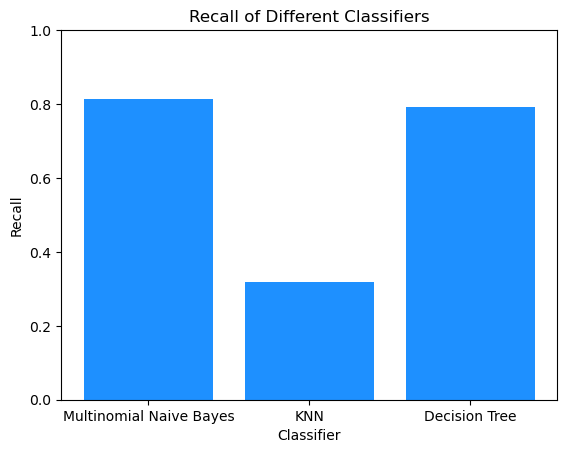

In [113]:
classifiers = {
    'Multinomial Naive Bayes':MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store accuracies
recalls = {}

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recalls[name] = recall_score(y_test, y_pred)

# Plot histogram
plt.bar( recalls.keys(),  recalls.values(), color=[ '#1E90FF'])
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall of Different Classifiers')
plt.ylim(0, 1)  
plt.show()

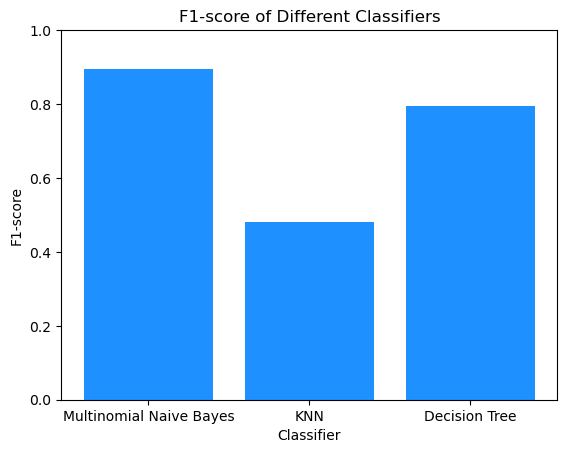

In [114]:
classifiers = {
    'Multinomial Naive Bayes':MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store accuracies
f1s = {}

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1s[name] = f1_score(y_test, y_pred)

# Plot histogram
plt.bar( f1s.keys(),  f1s.values(), color=[ '#1E90FF'])
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.title('F1-score of Different Classifiers')
plt.ylim(0, 1)  
plt.show()

In [118]:
new_text = ["hellooo how are you"]  # Note: Use a list for new data


new_text_tfidf = tfidf.transform(new_text)

# Make predictions
result = mnb.predict(new_text_tfidf)[0]

# Display the result
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam


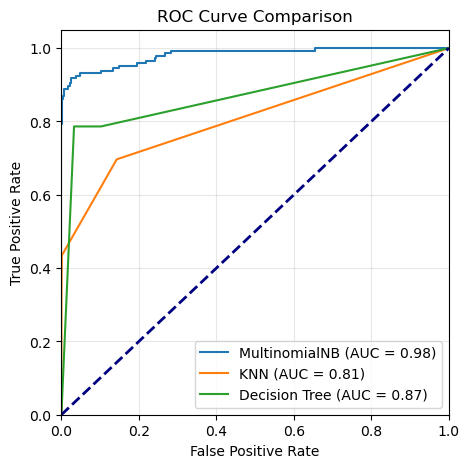

In [120]:

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = {
    'MultinomialNB': MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

plt.figure(figsize=(5, 5))


for name, model in classifiers.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  
        y_proba = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [126]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))